/var/folders/fc/fs9j8_5j73v0dccgsvwrdxmc0000gn/T/ipykernel_13851/3384320672.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


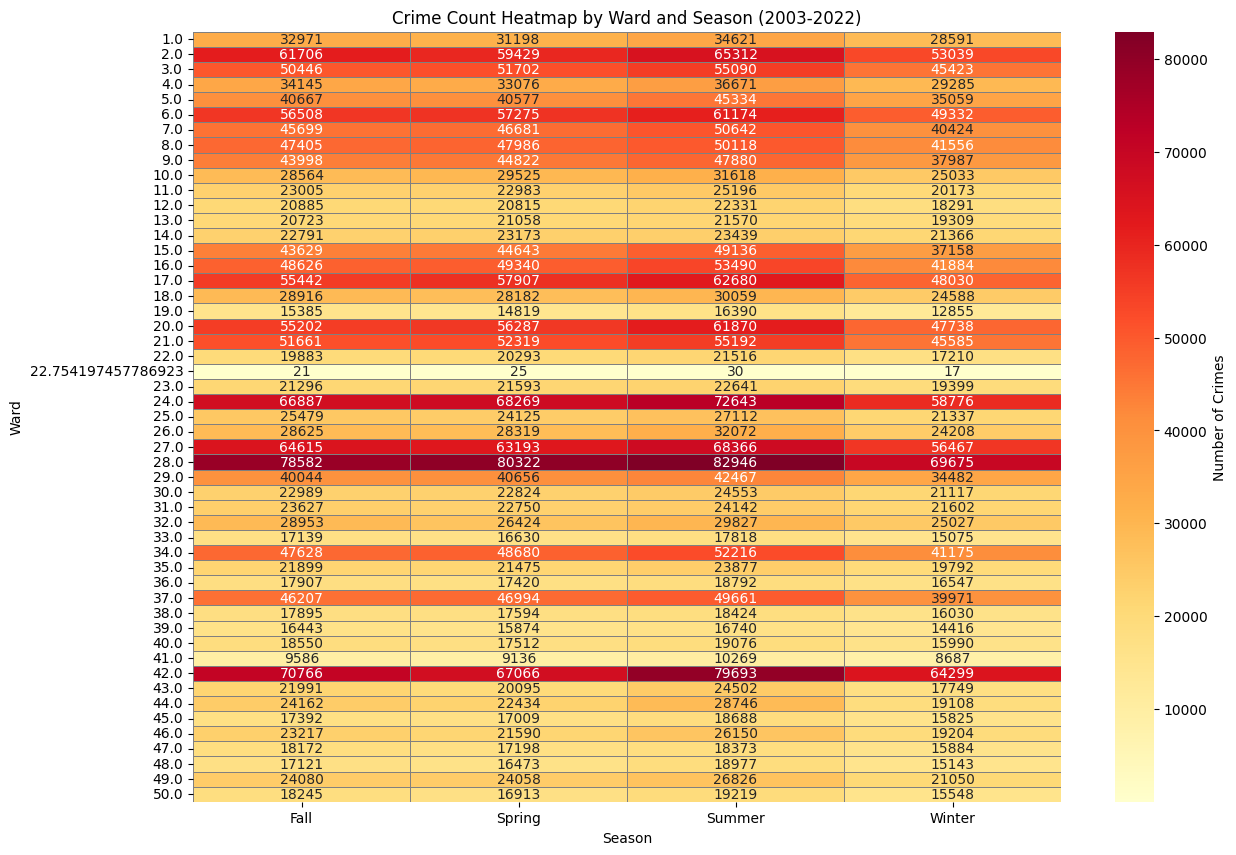

In [1]:
# 04_Seasonal_Heatmap.ipynb

# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load the Cleaned Data ---
df = pd.read_csv('../data/CleanedCrime.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# --- Filter to 2003-2022 ---
df = df[(df['Date'].dt.year >= 2003) & (df['Date'].dt.year <= 2022)]

# --- Create Season Column ---
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Date'].apply(get_season)

# --- Group by Ward and Season ---
ward_season_counts = df.groupby(['Ward', 'Season']).size().reset_index(name='Crime_Count')

# --- Pivot for Heatmap ---
ward_season_pivot = ward_season_counts.pivot(index='Ward', columns='Season', values='Crime_Count')

# --- Plot Heatmap ---
plt.figure(figsize=(14, 10))
sns.heatmap(ward_season_pivot, cmap='YlOrRd', linewidths=0.5, linecolor='gray', annot=True, fmt='.0f', cbar_kws={'label': 'Number of Crimes'})
plt.title('Crime Count Heatmap by Ward and Season (2003-2022)')
plt.xlabel('Season')
plt.ylabel('Ward')
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()


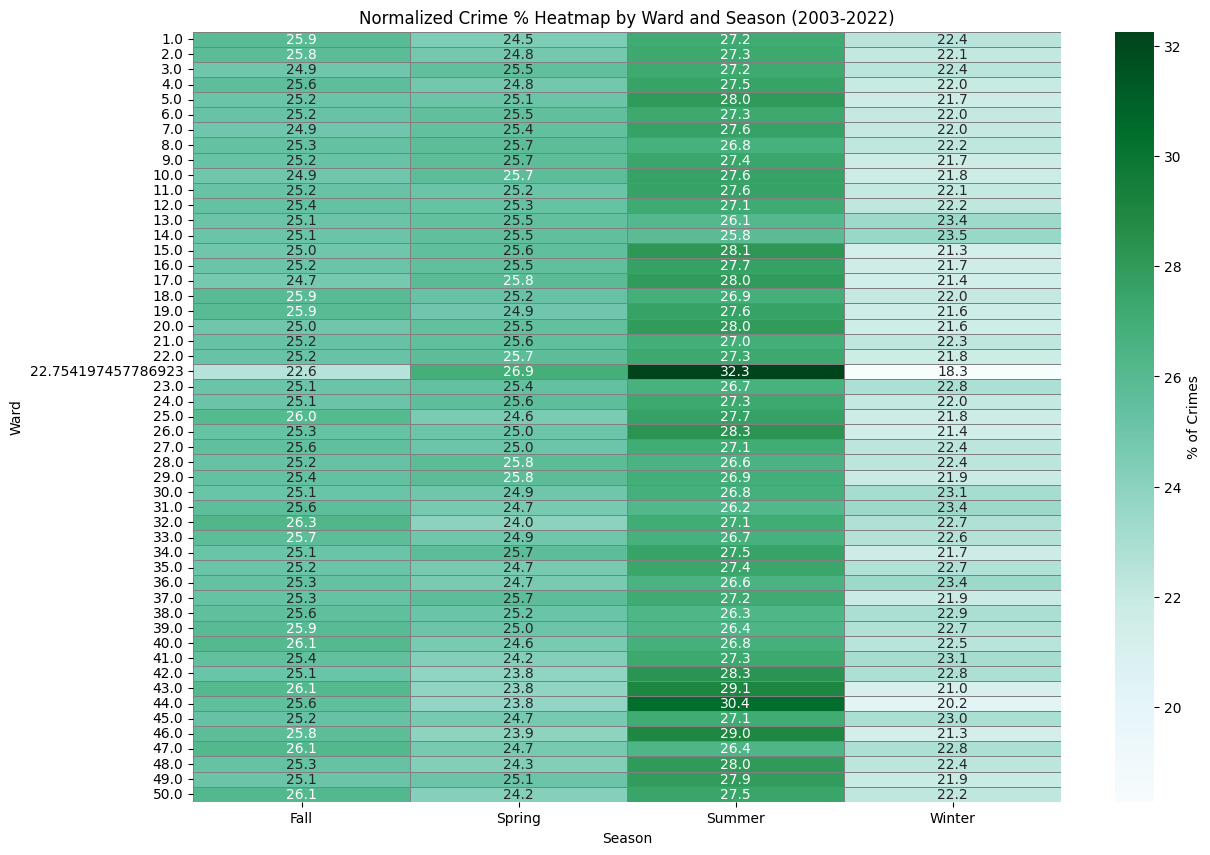

In [2]:
# --- Normalize Crime Counts per Ward (row) ---
ward_season_normalized = ward_season_pivot.div(ward_season_pivot.sum(axis=1), axis=0) * 100  # Now % per ward

# --- Plot Normalized Heatmap ---
plt.figure(figsize=(14, 10))
sns.heatmap(ward_season_normalized, cmap='BuGn', linewidths=0.5, linecolor='gray', annot=True, fmt='.1f', cbar_kws={'label': '% of Crimes'})
plt.title('Normalized Crime % Heatmap by Ward and Season (2003-2022)')
plt.xlabel('Season')
plt.ylabel('Ward')
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()
